In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [97]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [98]:
test = pd.read_csv('/Users/OldGreg/Desktop/Kaggle House Prices/test (1).csv', delimiter=',')
train = pd.read_csv('/Users/OldGreg/Desktop/Kaggle House Prices/train (1).csv', delimiter=',')

In [99]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [100]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [101]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [102]:
ytrain = train.pop('SalePrice')

In [103]:
# Check for nulls
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [104]:
train.loc[train['Alley'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,

In [105]:
# Starting with simple implementation for baseline

In [106]:
# First need to handle categorical values.
# This will also handle null values by assigning a number (-1). two birds, one stone!
train['MSZoning'] = train['MSZoning'].astype('category').cat.codes
train['LotFrontage'] = train['LotFrontage'].astype('category').cat.codes
train['Street'] = train['Street'].astype('category').cat.codes
train['Alley'] = train['Alley'].astype('category').cat.codes
train['LotShape'] = train['LotShape'].astype('category').cat.codes
train['LandContour'] = train['LandContour'].astype('category').cat.codes
train['Utilities'] = train['Utilities'].astype('category').cat.codes
train['LotFrontage'] = train['LotFrontage'].astype('category').cat.codes
train['LotConfig'] = train['LotConfig'].astype('category').cat.codes
train['LandSlope'] = train['LandSlope'].astype('category').cat.codes
train['LotFrontage'] = train['LotFrontage'].astype('category').cat.codes
train['Neighborhood'] = train['Neighborhood'].astype('category').cat.codes
train['Condition1'] = train['Condition1'].astype('category').cat.codes
train['Condition2'] = train['Condition2'].astype('category').cat.codes
train['BldgType'] = train['BldgType'].astype('category').cat.codes
train['HouseStyle'] = train['HouseStyle'].astype('category').cat.codes
train['RoofStyle'] = train['RoofStyle'].astype('category').cat.codes
train['RoofMatl'] = train['RoofMatl'].astype('category').cat.codes
train['Exterior1st'] = train['Exterior1st'].astype('category').cat.codes
train['Exterior2nd'] = train['Exterior2nd'].astype('category').cat.codes
train['MasVnrType'] = train['MasVnrType'].astype('category').cat.codes
train['ExterQual'] = train['ExterQual'].astype('category').cat.codes
train['ExterCond'] = train['ExterCond'].astype('category').cat.codes
train['Foundation'] = train['Foundation'].astype('category').cat.codes
train['BsmtQual'] = train['BsmtQual'].astype('category').cat.codes
train['BsmtCond'] = train['BsmtCond'].astype('category').cat.codes
train['BsmtExposure'] = train['BsmtExposure'].astype('category').cat.codes
train['BsmtFinType1'] = train['BsmtFinType1'].astype('category').cat.codes
train['BsmtFinType2'] = train['BsmtFinType2'].astype('category').cat.codes
train['Heating'] = train['Heating'].astype('category').cat.codes
train['HeatingQC'] = train['HeatingQC'].astype('category').cat.codes
train['CentralAir'] = train['CentralAir'].astype('category').cat.codes
train['Electrical'] = train['Electrical'].astype('category').cat.codes
train['KitchenQual'] = train['KitchenQual'].astype('category').cat.codes
train['Functional'] = train['Functional'].astype('category').cat.codes
train['FireplaceQu'] = train['FireplaceQu'].astype('category').cat.codes
train['GarageType'] = train['GarageType'].astype('category').cat.codes
train['GarageFinish'] = train['GarageFinish'].astype('category').cat.codes
train['GarageQual'] = train['GarageQual'].astype('category').cat.codes
train['GarageCond'] = train['GarageCond'].astype('category').cat.codes
train['PavedDrive'] = train['PavedDrive'].astype('category').cat.codes
train['PoolQC'] = train['PoolQC'].astype('category').cat.codes
train['Fence'] = train['Fence'].astype('category').cat.codes
train['MiscFeature'] = train['MiscFeature'].astype('category').cat.codes
train['SaleType'] = train['SaleType'].astype('category').cat.codes
train['SaleCondition'] = train['SaleCondition'].astype('category').cat.codes
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,37,8450,1,-1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,-1,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,-1,-1,-1,0,2,2008,8,4
1,2,20,3,52,9600,1,-1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,-1,-1,-1,0,5,2007,8,4
2,3,60,3,40,11250,1,-1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,-1,-1,-1,0,9,2008,8,4
3,4,70,3,32,9550,1,-1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,-1,-1,-1,0,2,2006,8,0
4,5,60,3,56,14260,1,-1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,-1,-1,-1,0,12,2008,8,4
5,6,50,3,57,14115,1,-1,0,3,0,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,2,0.0,3,4,5,2,3,3,2,732,5,0,64,796,1,0,1,4,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,-1,1,1993.0,2,2,480,4,4,2,40,30,0,320,0,0,-1,2,2,700,10,2009,8,4
6,7,20,3,47,10084,1,-1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186.0,2,4,2,0,3,0,2,1369,5,0,317,1686,1,0,1,4,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,2,1,2004.0,1,2,636,4,4,2,255,57,0,0,0,0,-1,-1,-1,0,8,2007,8,4
7,8,60,3,0,10382,1,-1,0,3,0,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,3,240.0,3,4,1,2,3,2,0,859,1,32,216,1107,1,0,1,4,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,4,1,1973.0,1,2,484,4,4,2,235,204,228,0,0,0,-1,-1,2,350,11,2009,8,4
8,9,50,4,23,6120,1,-1,3,3,0,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,2,0.0,3,4,0,3,3,3,5,0,5,0,952,952,1,2,1,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,4,5,1931.0,2,2,468,1,4,2,90,0,205,0,0,0,-1,-1,-1,0,4,2008,8,0
9,10,190,3,22,7420,1,-1,3,3,0,0,0,3,0,0,1,1,5,6,1939,1950,1,1,8,8,2,0.0,3,4,0,3,3,3,2,851,5,0,140,991,1,0,1,4,1077,0,0,1077,1,0,1,0,2,2,3,5,6,2,4,1,1939.0,1,1,205,2,4,2,0,4,0,0,0,0,-1,-1,-1,0,1,2008,8,4


In [107]:
#check for lingering nulls
train.isnull().any()
# MasVnrArea, GarageYrBlt

# hanlde these with neg number
train['MasVnrArea'] = train['MasVnrArea'].fillna(value=0)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(value=0)


In [108]:
# Apply all same filters to test set
test['MSZoning'] = test['MSZoning'].astype('category').cat.codes
test['LotFrontage'] = test['LotFrontage'].astype('category').cat.codes
test['Street'] = test['Street'].astype('category').cat.codes
test['Alley'] = test['Alley'].astype('category').cat.codes
test['LotShape'] = test['LotShape'].astype('category').cat.codes
test['LandContour'] = test['LandContour'].astype('category').cat.codes
test['Utilities'] = test['Utilities'].astype('category').cat.codes
test['LotFrontage'] = test['LotFrontage'].astype('category').cat.codes
test['LotConfig'] = test['LotConfig'].astype('category').cat.codes
test['LandSlope'] = test['LandSlope'].astype('category').cat.codes
test['LotFrontage'] = test['LotFrontage'].astype('category').cat.codes
test['Neighborhood'] = test['Neighborhood'].astype('category').cat.codes
test['Condition1'] = test['Condition1'].astype('category').cat.codes
test['Condition2'] = test['Condition2'].astype('category').cat.codes
test['BldgType'] = test['BldgType'].astype('category').cat.codes
test['HouseStyle'] = test['HouseStyle'].astype('category').cat.codes
test['RoofStyle'] = test['RoofStyle'].astype('category').cat.codes
test['RoofMatl'] = test['RoofMatl'].astype('category').cat.codes
test['Exterior1st'] = test['Exterior1st'].astype('category').cat.codes
test['Exterior2nd'] = test['Exterior2nd'].astype('category').cat.codes
test['MasVnrType'] = test['MasVnrType'].astype('category').cat.codes
test['ExterQual'] = test['ExterQual'].astype('category').cat.codes
test['ExterCond'] = test['ExterCond'].astype('category').cat.codes
test['Foundation'] = test['Foundation'].astype('category').cat.codes
test['BsmtQual'] = test['BsmtQual'].astype('category').cat.codes
test['BsmtCond'] = test['BsmtCond'].astype('category').cat.codes
test['BsmtExposure'] = test['BsmtExposure'].astype('category').cat.codes
test['BsmtFinType1'] = test['BsmtFinType1'].astype('category').cat.codes
test['BsmtFinType2'] = test['BsmtFinType2'].astype('category').cat.codes
test['Heating'] = test['Heating'].astype('category').cat.codes
test['HeatingQC'] = test['HeatingQC'].astype('category').cat.codes
test['CentralAir'] = test['CentralAir'].astype('category').cat.codes
test['Electrical'] = test['Electrical'].astype('category').cat.codes
test['KitchenQual'] = test['KitchenQual'].astype('category').cat.codes
test['Functional'] = test['Functional'].astype('category').cat.codes
test['FireplaceQu'] = test['FireplaceQu'].astype('category').cat.codes
test['GarageType'] = test['GarageType'].astype('category').cat.codes
test['GarageFinish'] = test['GarageFinish'].astype('category').cat.codes
test['GarageQual'] = test['GarageQual'].astype('category').cat.codes
test['GarageCond'] = test['GarageCond'].astype('category').cat.codes
test['PavedDrive'] = test['PavedDrive'].astype('category').cat.codes
test['PoolQC'] = test['PoolQC'].astype('category').cat.codes
test['Fence'] = test['Fence'].astype('category').cat.codes
test['MiscFeature'] = test['MiscFeature'].astype('category').cat.codes
test['SaleType'] = test['SaleType'].astype('category').cat.codes
test['SaleCondition'] = test['SaleCondition'].astype('category').cat.codes
test['MasVnrArea'] = test['MasVnrArea'].fillna(value=0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(value=0)

test.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1        True
BsmtFinType2     False
BsmtFinSF2        True
BsmtUnfSF         True
TotalBsmtSF       True
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

Id                 int64
MSSubClass         int64
MSZoning            int8
LotFrontage         int8
LotArea            int64
Street              int8
Alley               int8
LotShape            int8
LandContour         int8
Utilities           int8
LotConfig           int8
LandSlope           int8
Neighborhood        int8
Condition1          int8
Condition2          int8
BldgType            int8
HouseStyle          int8
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle           int8
RoofMatl            int8
Exterior1st         int8
Exterior2nd         int8
MasVnrType          int8
MasVnrArea       float64
ExterQual           int8
ExterCond           int8
Foundation          int8
BsmtQual            int8
BsmtCond            int8
BsmtExposure        int8
BsmtFinType1        int8
BsmtFinSF1       float64
BsmtFinType2        int8
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating             int8


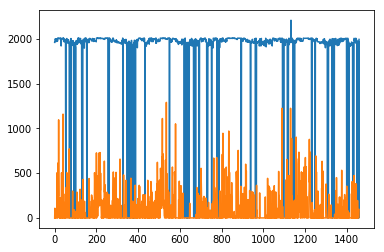

In [109]:
# debugging for error in test set
#Input contains NaN, infinity or a value too large for dtype('float64').
test.loc[test['GarageYrBlt'].isnull()]
test.loc[test['MasVnrArea'].isnull()]

test['GarageYrBlt'].plot()
test['MasVnrArea'].plot()

test['MasVnrArea'].unique()

# can't find so converting to int

#test['MasVnrArea'] = test['MasVnrArea'].astype('int')
#test['GarageYrBlt'] = test['GarageYrBlt'].astype('int')

test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(value=-1)
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(value=-1)
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(value=-1)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(value=-1)
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(value=-1)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(value=-1)
test['GarageCars'] = test['GarageCars'].fillna(value=-1)
test['GarageArea'] = test['GarageArea'].fillna(value=-1)

test.dtypes

In [110]:
#with no feature engr or tuning, we can now test a baseline linear reg fit
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train, ytrain)

# Make predictions using the testing set
y_pred = regr.predict(test)

In [111]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, y_pred))

# Plot outputs
plt.scatter(test, ytest,  color='black')
plt.plot(test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [-5.07309609e-01 -6.23798707e+01 -1.70792539e+03  1.70647937e+01
  3.82012578e-01  3.57089752e+04 -2.08709619e+03 -8.44182808e+02
  2.12937817e+03 -4.43119468e+04  1.62660458e+02  4.96453131e+03
  3.86054454e+02 -4.93547426e+02 -9.43599333e+03 -2.25598936e+03
 -7.21025787e+02  1.03853134e+04  5.83032357e+03  2.22290694e+02
  1.39303644e+01  9.96925759e+02  4.55761766e+03 -1.11496889e+03
  6.17315714e+02  3.56310534e+03  3.07024901e+01 -9.96764433e+03
  7.83358899e+02  6.53547905e+01 -6.99851224e+03  2.15316012e+03
 -2.82480967e+03 -3.08014155e+02  7.72341475e+00  2.33562362e+03
  1.24778584e+01 -2.62503179e+00  1.75762415e+01 -2.28313459e+03
 -5.27976979e+02  6.80388630e+02 -6.37609670e+02  2.13610960e+01
  2.51895955e+01 -2.90265692e+01  1.75241223e+01  5.77777033e+03
 -7.51095495e+02  2.37194444e+03  4.87258279e+01 -4.73746479e+03
 -1.96783494e+04 -7.17033609e+03  4.47721461e+03  3.53175659e+03
  8.40350309e+03 -1.36228008e+03  7.42377496e+02 -7.70764489e+00
 -1.44733

NameError: name 'ytest' is not defined

In [115]:
id = test["Id"]
submissiondf = {"Id": id,
                 "SalePrice": y_pred}
submission1 = pd.DataFrame(submissiondf)
submission1
submission1.to_csv("/Users/OldGreg/Desktop/Kaggle House Prices/submission1.csv",index=False)


In [ ]:
# The simple submission got a score of 0.17716 (this is error. Where 0 would be perfect)